# Flight Incident Analysis

This notebook performs an in-depth analysis of aviation incident data, exploring key trends and insights related to the frequency and severity of incidents. We aim to identify the most common factors contributing to aviation accidents, including location, operator, aircraft type, and fatalities.

### Key Areas of Focus:
- Total incidents and fatalities
- Incident trends over time (by year, month)
- Analysis of the most common operators, aircraft types, and locations
- Fatality rate trends
- Word cloud of incident summaries
.


## Features
- Data analysis and visualization of flight incidents.
- Bar charts for the top 10 operators, aircraft types, and locations.
- Interactive maps (optional for advanced analysis).
- Insights into trends and patterns based on data from a real-world dataset.


## Requirements
- Python 3.x
- pandas
- matplotlib
- seaborn

You can install the necessary libraries using:
```bash
pip install -r requirements.txt


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Data Exploration

In this section, we load and explore the dataset to understand the basic structure and clean the data. The analysis focuses on handling missing values and formatting columns to prepare for deeper insights.## Steps:
- Inspecting the dataset and basic statistics
- Handling missing values for key columns (e.g., time, flight number, aircraft type)
eeper analysis


In [86]:
df = pd.read_csv('Airplane_Crashes.csv')

In [87]:
df.head() 

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4192 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

# Missing Data Analysis

Before diving into the analysis, we examine the extent of missing data in the dataset. Identifying missing values will guide us in choosing appropriate methods to handle them.

- **Columns with Missing Values**: Time, Location, Operator, Flight #, Route, AC Type, etc.
- **Approach**: Fill missing values where possible (e.g., filling with 'Unknown') or remove rows if necessary.


In [89]:
print(df.isnull().sum())

Date                        0
Time                     1510
Location                    4
Operator                   10
Flight #                 3652
Route                     775
AC Type                    15
Registration              273
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     41
Summary                    64
dtype: int64


In [90]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Replace missing 'Time', 'Flight #', 'Route', 'Registration', and 'cn/ln' with 'Unknown'
df['Time'] = df['Time'].fillna('Unknown')
df['Flight #'] = df['Flight #'].fillna('Unknown')
df['Route'] = df['Route'].fillna('Unknown')
df['Registration'] = df['Registration'].fillna('Unknown')
df['cn/ln'] = df['cn/ln'].fillna('Unknown')



In [91]:
df = df.dropna(subset=['Date'])

In [92]:
numerical_cols = ['Aboard', 'Aboard Passangers', 'Aboard Crew', 'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground']
df[numerical_cols] = df[numerical_cols].fillna(0)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4967 non-null   datetime64[ns]
 1   Time                   4967 non-null   object        
 2   Location               4963 non-null   object        
 3   Operator               4957 non-null   object        
 4   Flight #               4967 non-null   object        
 5   Route                  4967 non-null   object        
 6   AC Type                4952 non-null   object        
 7   Registration           4967 non-null   object        
 8   cn/ln                  4967 non-null   object        
 9   Aboard                 4967 non-null   float64       
 10  Aboard Passangers      4967 non-null   float64       
 11  Aboard Crew            4967 non-null   float64       
 12  Fatalities             4967 non-null   float64       
 13  Fat

# Total Incidents and Fatalities

We begin by calculating the total number of incidents and fatalities in the dataset. Additionally, we calculate the average fatalities per incident to understand the severity of the accidents.

- **Total Incidents*4967: `X`
- **Total Fatalities110775.0*: `
- **Average Fatalities per Inden22.30**: `Z`
ities


In [94]:
# Total number of incidents
total_incidents = len(df)

# Total and average fatalities
total_fatalities = df['Fatalities'].sum()
avg_fatalities = df['Fatalities'].mean()

print(f"Total Incidents: {total_incidents}")
print(f"Total Fatalities: {total_fatalities}")
print(f"Average Fatalities per Incident: {avg_fatalities:.2f}")


Total Incidents: 4967
Total Fatalities: 110775.0
Average Fatalities per Incident: 22.30


# Incidents and Fatalities Over Time

In this section, we explore how the number of incidents and fatalities have evolved over time.

- **Yearly Statistics**: We calculate the total fatalities and the number of passengers aboard for each year, then compute the fatality rate.
- **Fatality Rate Over Time**: We plot the fatality rate over the years to observe any trends.

## Visualizations:
- Line chart showing the **fatality rate** over time
- Bar plot showing incidents per year and fatality rate


In [58]:
# Incidents and fatalities by year
yearly_stats = df.groupby('Year').agg({'Fatalities': 'sum', 'Aboard': 'sum'}).reset_index()
yearly_stats['Fatality Rate'] = yearly_stats['Fatalities'] / yearly_stats['Aboard']

# Incidents by operator
operator_stats = df['Operator'].value_counts().head(10)
print(operator_stats)


Operator
Aeroflot                               255
Military - U.S. Air Force              140
Air France                              72
Deutsche Lufthansa                      63
United Air Lines                        44
Military - U.S. Army Air Forces         43
China National Aviation Corporation     43
Pan American World Airways              41
American Airlines                       37
US Aerial Mail Service                  35
Name: count, dtype: int64


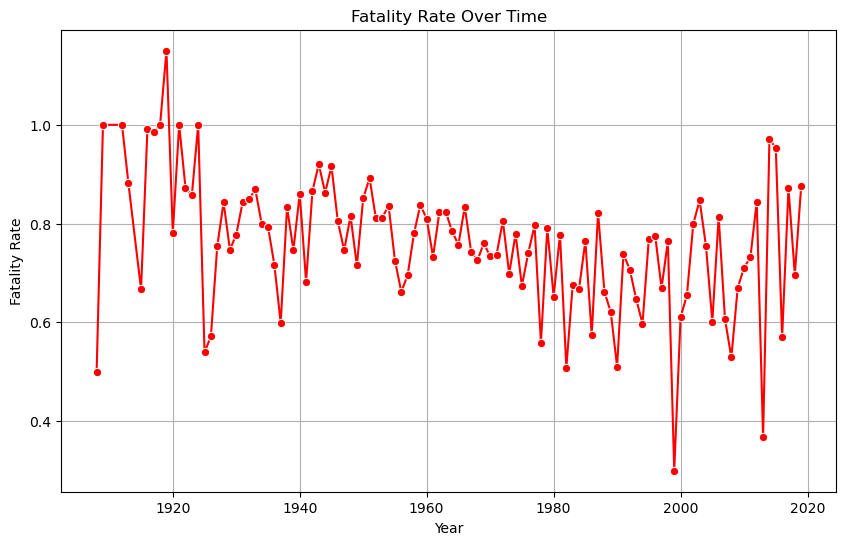

In [59]:
# Plot fatality rate over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_stats, x='Year', y='Fatality Rate', marker='o', color='red')
plt.title("Fatality Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Fatality Rate")
plt.grid(True)
plt.show()


# Top 10 Operators and Aircraft Types by Incidents

We identify the operators and aircraft types with the most incidents. This helps pinpoint any patterns in operator behavior or aircraft design that may contribute to higher incident frequencies.

- **Top Operator Incident**: Aeroflot has the most incidents, followed by the US Air Force
- **Top Aircraft Type Incident**: The Douglas DC-3 is the aircraft with the most incidents.

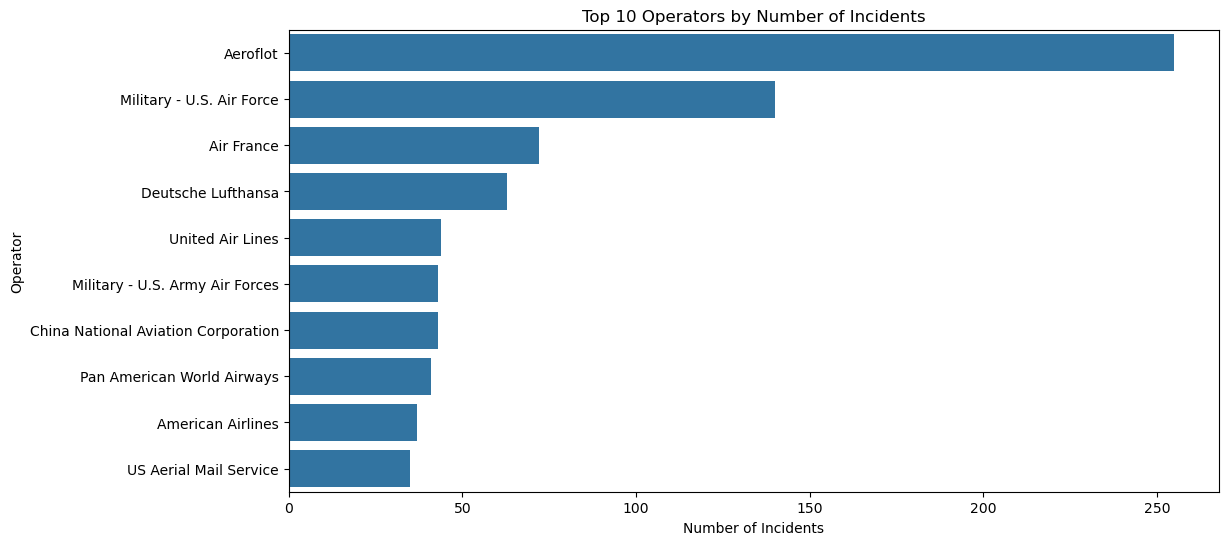

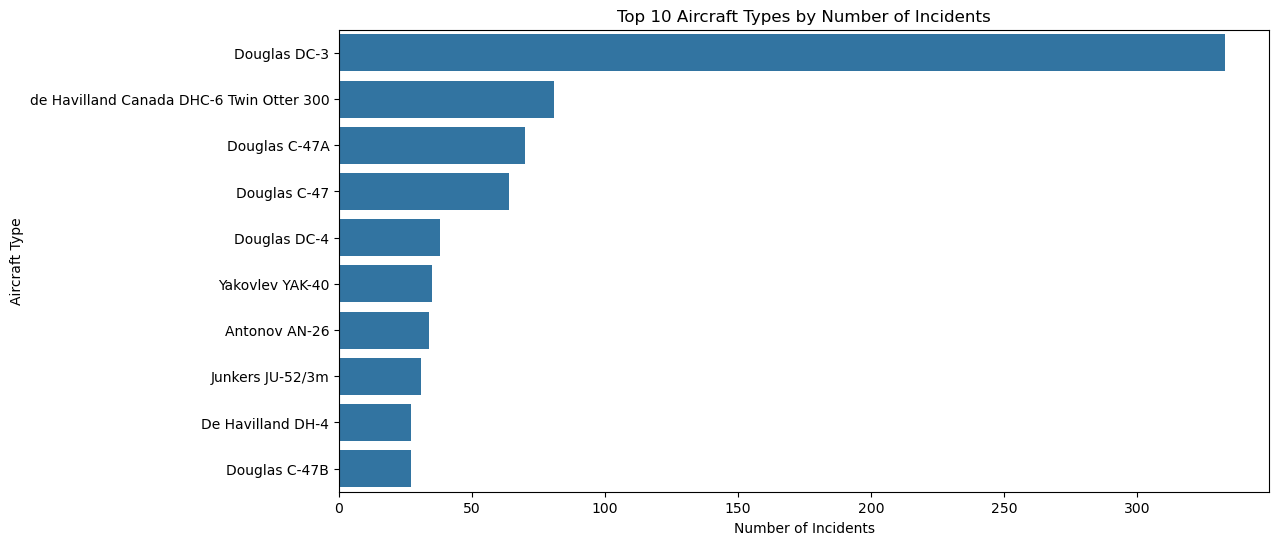

In [97]:
# Top 10 operators with the most incidents
top_operators = df['Operator'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_operators.values, y=top_operators.index)
plt.title("Top 10 Operators by Number of Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Operator")
plt.show()

# Top 10 aircraft types with the most incidents
top_aircraft = df['AC Type'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_aircraft.values, y=top_aircraft.index)
plt.title("Top 10 Aircraft Types by Number of Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Aircraft Type")
plt.show()


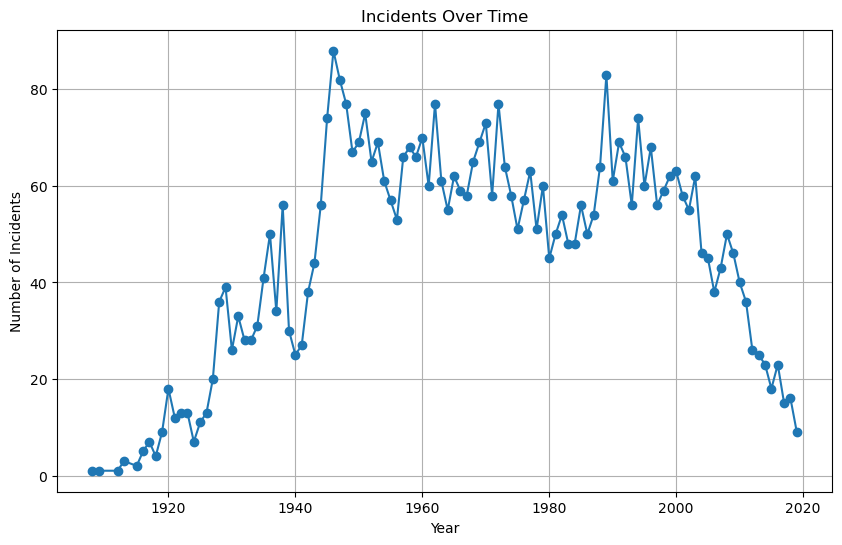

In [95]:
# Extract year from 'Date'
df['Year'] = df['Date'].dt.year

# Incidents by year
incidents_per_year = df.groupby('Year').size()

# Plot incidents over time
plt.figure(figsize=(10, 6))
plt.plot(incidents_per_year, marker='o')
plt.title("Incidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()


# Location Analysis

In this section, we analyze the locations where most incidents occur. Understanding geographical trends can help identify regions that might require enhanced safety measures.

- **Top Location with Most Incidents**: The following Bar chart shows that Moscow, Russia has the most incidents


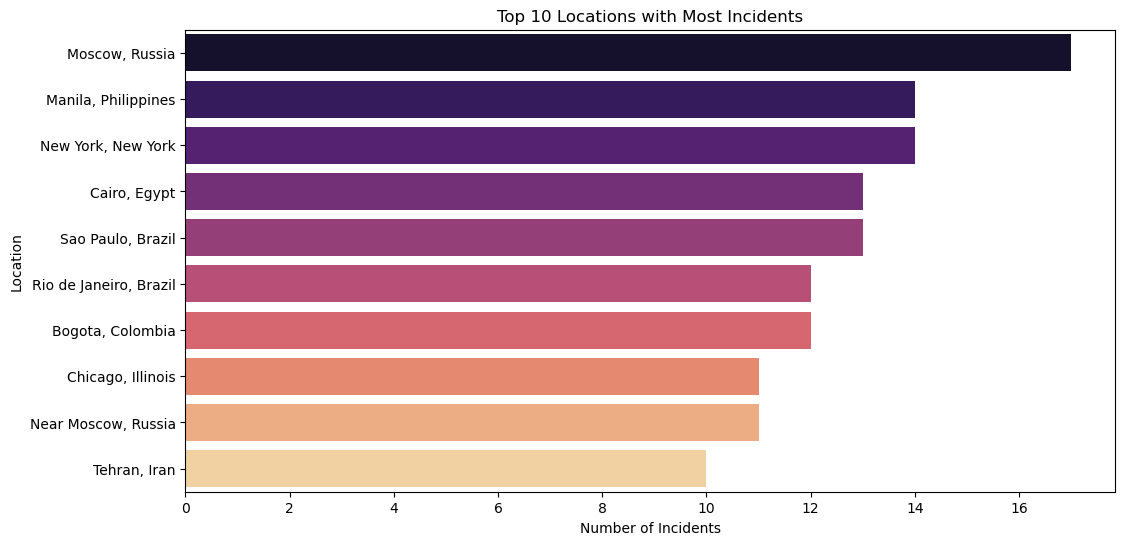

In [54]:
# Top 10 locations with most incidents
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, hue=top_locations.index, palette="magma", legend=False)
plt.title("Top 10 Locations with Most Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Location")
plt.show()


# Word Cloud of Incident Summaries

We generate a word cloud from the summaries of incidents to visualize the most common terms and phrases in the dataset. This helps identify recurring themes or keywords associated with aviation incidents.

- **Word Cloud Visualization**: Most common words in incident summaries


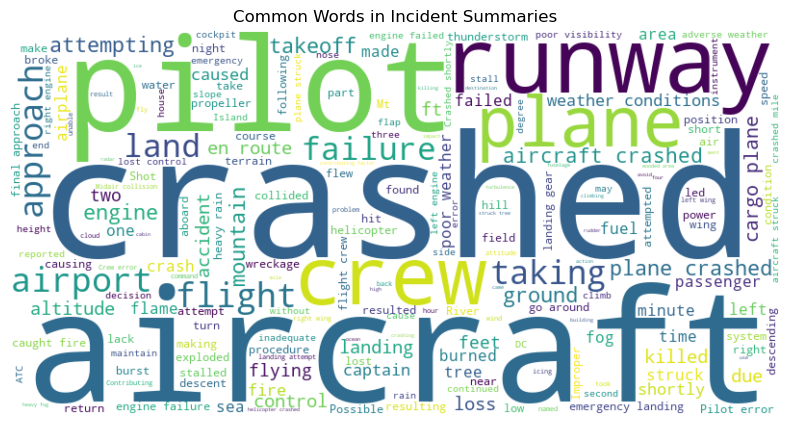

In [55]:
# Combine all summaries into a single text string
text = " ".join(str(summary) for summary in df['Summary'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Incident Summaries")
plt.show()


In [57]:
# Add a fatality rate column
df['Fatality Rate'] = df['Fatalities'] / df['Aboard']
df['Fatality Rate'] = df['Fatality Rate'].fillna(0)  # Handle division by zero

# Categorize incidents based on fatalities
df['Incident Type'] = df['Fatalities'].apply(lambda x: 'Fatal' if x > 0 else 'Non-Fatal')



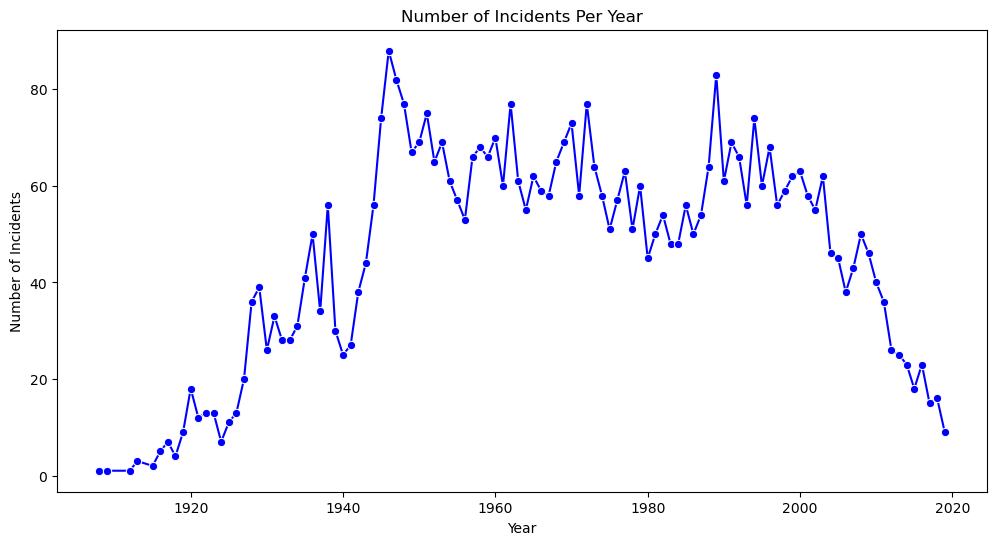

In [61]:
# Extract year from 'Date' and group by year
df['Year'] = df['Date'].dt.year

# Count incidents per year
incident_by_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_by_year.index, y=incident_by_year.values, marker='o', color='b')
plt.title("Number of Incidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()


# Monthly Incident Trends

We analyze the number of incidents that occur each month, looking for any seasonal trends or patterns.

- **Incidents Per Month**: The line chart below shows that December has the highest number of incidents.

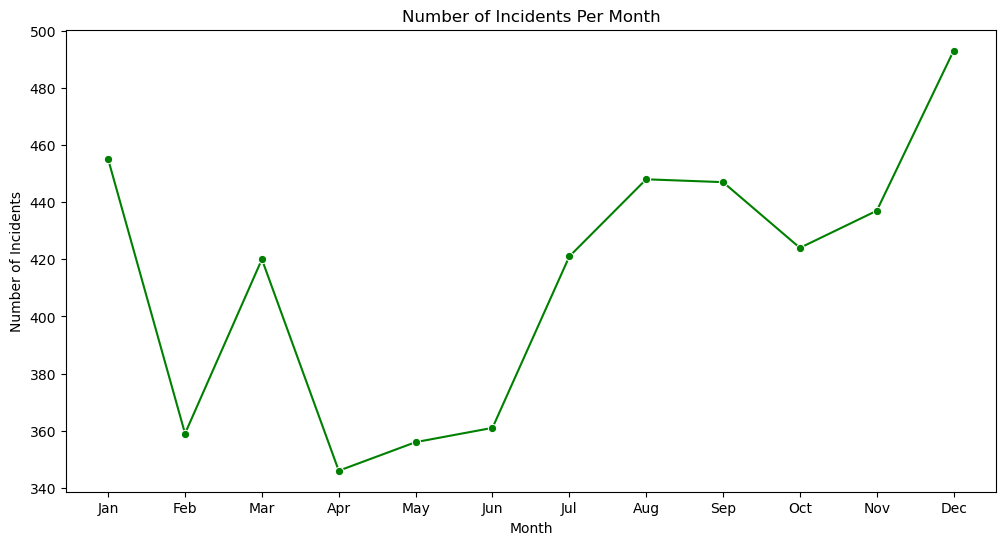

In [71]:
# Extract month from 'Date'
df['Month'] = df['Date'].dt.month

# Count incidents per month
incident_by_month = df['Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_by_month.index, y=incident_by_month.values, marker='o', color='g')
plt.title("Number of Incidents Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# Future Work

Several areas of the analysis can be extended or refined:
- Integrating weather data to assess its impact on incidents
- Investigating incident severity based on flight phases (takeoff, landing, etc.)
- Exploring potential correlations between crew experience, aircraft age, and incident outcomes
